**검안경으로 촬영한 데이터 포함 후 이미지 증강 진행 그리고 train data를 25,000개로 통일 후 학습한 모델로 테스트**

In [12]:
import tensorflow as tf
import os
from scipy.special import softmax
from PIL import Image
import numpy as np


In [2]:
test_data = '/content/drive/MyDrive/CV_project/data/안구질환/개_train_test_val_squared/test'


In [3]:
model_path = '/content/drive/MyDrive/CV_project/안구질환_모델/Resnet_squared_all_25000_checkpoint.tf'
model = tf.keras.models.load_model(model_path)

In [8]:
# 라벨 한국어 번역
labels= [
    '결막염',
    '궤양성각막질환',
    '백내장',
    '비궤양성각막질환',
    '색소침착성각막염',
    '안검내반증',
    '안검염',
    '안검종양',
    '유루증',
    '정상',
    '핵경화'
]

In [10]:
def inference(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img = np.array(img)

    img = img / 255.
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img, verbose=0)
    return pred


* predictions 딕셔너리는 예측 결과를 저장하는 데 사용됩니다.
* target 리스트는 실제 레이블(폴더 이름)을 저장합니다.
* pred 리스트는 모델이 예측한 레이블을 저장합니다.
* prob 리스트는 각 클래스에 대한 예측 확률을 저장합니다.







In [13]:
# 예측 결과를 저장할 딕셔너리를 초기화합니다.
predictions = {'target':[], 'pred':[], 'prob':[]}

# 테스트 데이터 디렉토리 내의 각 폴더를 순회합니다.
for folder in os.listdir(test_data):
    print(folder)  # 현재 폴더(클래스 이름)를 출력합니다.

    # 각 폴더 내의 파일을 순회합니다.
    for file in os.listdir(os.path.join(test_data, folder)):
        # 파일 경로를 사용하여 추론을 수행하고 예측 결과를 반환합니다.
        pred = inference(os.path.join(test_data, folder, file))

        # 실제 레이블(폴더 이름)을 target 리스트에 추가합니다.
        predictions['target'].append(folder)

        # 예측된 클래스 이름을 pred 리스트에 추가합니다.
        predictions['pred'].append(labels[pred.argmax()])

        # 각 클래스에 대한 예측 확률 배열을 prob 리스트에 추가합니다.
        predictions['prob'].append(pred.tolist())

        # 1000개의 예측이 완료될 때마다 진행 상황을 출력합니다.
        if len(predictions['target']) % 1000 == 0:
            print(len(predictions['target']), "predictions done")


안검내반증
정상
1000 predictions done
2000 predictions done
3000 predictions done
4000 predictions done
5000 predictions done
6000 predictions done
7000 predictions done
8000 predictions done
9000 predictions done
핵경화
안검종양
백내장
비궤양성각막질환
궤양성각막질환
색소침착성각막염
결막염
10000 predictions done
안검염
유루증


In [14]:
from collections import Counter

Counter(predictions['target'])

Counter({'안검내반증': 675,
         '정상': 8515,
         '핵경화': 72,
         '안검종양': 11,
         '백내장': 107,
         '비궤양성각막질환': 77,
         '궤양성각막질환': 415,
         '색소침착성각막염': 45,
         '결막염': 111,
         '안검염': 129,
         '유루증': 841})

In [15]:
Counter(predictions['pred'])

Counter({'안검내반증': 903,
         '유루증': 908,
         '안검염': 205,
         '정상': 8161,
         '백내장': 83,
         '안검종양': 16,
         '궤양성각막질환': 391,
         '결막염': 98,
         '핵경화': 87,
         '색소침착성각막염': 70,
         '비궤양성각막질환': 76})

In [16]:
import unicodedata
target = [unicodedata.normalize('NFC', t) for t in predictions['target']]
predictions['target'] = target

In [17]:
pred = [unicodedata.normalize('NFC', p) for p in predictions['pred']]
predictions['pred'] = pred

### D2 폰트 적용

In [18]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_files = font_manager.findSystemFonts(fontpaths='/content/drive/MyDrive/Pal-ette/D2Coding')
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rc('font', family='D2Coding')

### confusion matrix 생성 및 시각화

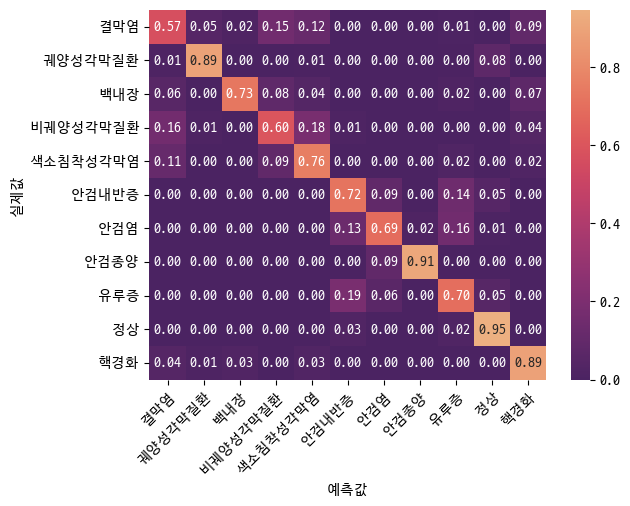

In [19]:
# confusion matrix 생성 및 시각화
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(predictions['target'], predictions['pred'], normalize='true')
hm = sns.heatmap(cm, annot=True, fmt='.2f', cmap='flare_r')
hm.set_xlabel('예측값', fontsize=10)
hm.set_ylabel('실제값', fontsize=10)
hm.set_xticklabels(labels=labels, fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
hm.set_yticklabels(labels=labels, fontsize=10, rotation=0)

plt.show()

In [20]:
from sklearn.metrics import classification_report

cr = classification_report(predictions['target'], predictions['pred'])
print(cr)

              precision    recall  f1-score   support

         결막염       0.64      0.57      0.60       111
     궤양성각막질환       0.95      0.89      0.92       415
         백내장       0.94      0.73      0.82       107
    비궤양성각막질환       0.61      0.60      0.60        77
    색소침착성각막염       0.49      0.76      0.59        45
       안검내반증       0.54      0.72      0.61       675
         안검염       0.43      0.69      0.53       129
        안검종양       0.62      0.91      0.74        11
         유루증       0.65      0.70      0.67       841
          정상       0.99      0.95      0.97      8515
         핵경화       0.74      0.89      0.81        72

    accuracy                           0.90     10998
   macro avg       0.69      0.76      0.72     10998
weighted avg       0.91      0.90      0.90     10998

